<a href="https://colab.research.google.com/github/javgat/viu-algoritmos-de-optimizacion/blob/master/Algoritmos_Javier_Gat%C3%B3n_Herguedas_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Javier Gatón Herguedas <br>
Link:   https://colab.research.google.com/drive/1D-Cn2AJcEjrgs8uDqKCLy2ZZFB9vj1BQ?usp=sharing <br>
Github: https://github.com/javgat/viu-algoritmos-de-optimizacion
<br>




In [1]:
import math
INF = float("inf")
from typing import List, Tuple, Dict

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

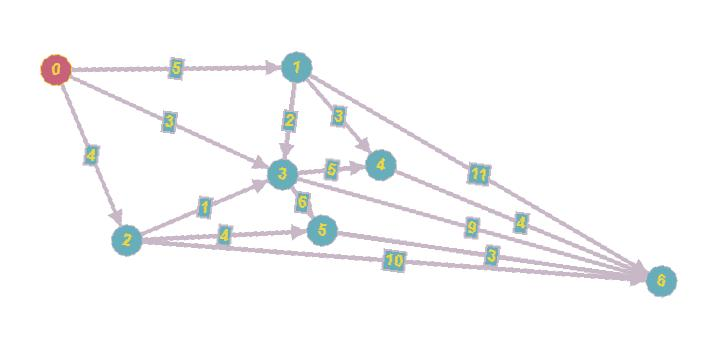

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
  [0, 5, 4, 3, INF, INF, INF],
  [INF, 0, INF, 2, 3, INF, 11],
  [INF, INF, 0, 1, INF, 4, 10],
  [INF, INF, INF, 0, 5, 6, 9],
  [INF, INF, INF, INF, 0, INF, 4],
  [INF, INF, INF, INF, INF, 0, 3],
  [INF, INF, INF, INF, INF, INF, 0],
]

TARIFAS

[[0, 5, 4, 3, inf, inf, inf],
 [inf, 0, inf, 2, 3, inf, 11],
 [inf, inf, 0, 1, inf, 4, 10],
 [inf, inf, inf, 0, 5, 6, 9],
 [inf, inf, inf, inf, 0, inf, 4],
 [inf, inf, inf, inf, inf, 0, 3],
 [inf, inf, inf, inf, inf, inf, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def get_precios_y_rutas(tarifas: list) -> tuple:
  # Calculo de la matriz de precios y rutas
  # N: Total de Nodos
  N = len(tarifas[0])
  precios = [[INF]*N for i in range(N)]
  ruta = [[None]*N for i in range(N)]
  for i in range(N):
    ruta[i][i] = i # Para ir de i a i se "pasa por i"
    precios[i][i] = 0 # Para ir de i a i se se paga 0
    for j in range(i+1, N):
      min_tarifa = tarifas[i][j]
      ruta[i][j] = i
      for k in range(i, j):
        if precios[i][k] + tarifas[k][j] < min_tarifa:
            min_tarifa = min(min_tarifa, precios[i][k] + tarifas[k][j] )
            ruta[i][j] = k # Anota que para ir de i a j hay que pasar por k
        precios[i][j] = min_tarifa
  return precios, ruta

In [4]:
precios, rutas = get_precios_y_rutas(TARIFAS)  

print("Precios:")
for precio in precios:
  print(precio)

print("Rutas:")  
for ruta in rutas:
  print(ruta)  

Precios:
[0, 5, 4, 3, 8, 8, 11]
[inf, 0, inf, 2, 3, 8, 7]
[inf, inf, 0, 1, 6, 4, 7]
[inf, inf, inf, 0, 5, 6, 9]
[inf, inf, inf, inf, 0, inf, 4]
[inf, inf, inf, inf, inf, 0, 3]
[inf, inf, inf, inf, inf, inf, 0]
Rutas:
[0, 0, 0, 0, 1, 2, 5]
[None, 1, 1, 1, 1, 3, 4]
[None, None, 2, 2, 3, 2, 5]
[None, None, None, 3, 3, 3, 3]
[None, None, None, None, 4, 4, 4]
[None, None, None, None, None, 5, 5]
[None, None, None, None, None, None, 6]


In [5]:
def calcular_ruta(ruta, desde, hasta) -> list:
  #Determinar la ruta con Recursividad
  if desde == hasta:
    return []
  else:
    de_a = ruta[desde][hasta]
    return calcular_ruta(ruta, desde, de_a) + [de_a]


print("\nLa ruta es:")  
calcular_ruta(rutas, 0, 6)


La ruta es:


[0, 2, 5]

##Problema de Asignacion de tarea

In [6]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A 
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


# Costes es una lista de listas. Cada sublista/fila representa a un agente.
# Columnas: Tareas
        

In [7]:
# Solucion es una tupla, con el numero de tarea que hara el agente i-esimo.
# (3, 2,) -> Agente 0 tarea 3, agente 1 tarea 2.

#Calculo del valor de una solucion parcial
def calc_valor(sol: Tuple[int], costes: List[List[int]]) -> int:
  val = 0
  for i in range(len(sol)):
    val += costes[sol[i]][i] 
  return val

calc_valor((3, 2,), COSTES)

34

### Fuerza Bruta

In [57]:
# Fuerza Bruta
import itertools

def asignacion_tarea_fuerza_bruta(costes: List[List[int]]) -> Tuple[int]:
  # O(n!)
  min_val = INF
  min_sol = ()
  num_agentes = len(costes)
  num_jobs = len(costes[0])
  for s in list(itertools.permutations(range(len(costes)))):
    valor = calc_valor(s, costes)
    if valor < min_val:
      min_val = valor
      min_sol = s 
  return min_sol

### Ramificación y Corte

In [60]:
# COTAS

# Esto estaba mal en las diapositivas

def cota_inf(sol: Tuple[int], costes: List[List[int]]) -> int:
  val = 0
  #Valores establecidos
  for i in range(len(sol)):
    val += costes[sol[i]][i]
  #Estimacion
  for i in range(len(sol), len(costes)):
    val += min([costes[j][i] for j in range(len(costes)) if j not in sol])
  return val

def cota_sup(sol: Tuple[int], costes: List[List[int]]) -> int:
  val = 0
  #Valores establecidos
  for i in range(len(sol)):
    val += costes[sol[i]][i]
  #Estimacion
  for i in range(len(sol), len(costes)):
    val += max([costes[j][i] for j in range(len(costes)) if j not in sol])
  return val

def cotas(sol: Tuple[int], costes: List[List[int]]) -> Tuple[int]:
  val = 0
  #Valores establecidos
  for i in range(len(sol)):
    val += costes[sol[i]][i]
  supval = val
  #Estimacion
  for i in range(len(sol), len(costes)):
    val += min([costes[j][i] for j in range(len(costes)) if j not in sol])
    supval += max([costes[j][i] for j in range(len(costes)) if j not in sol])
  return val, supval

print(cota_inf((0,1),COSTES))
print(cota_sup((0,1),COSTES))
print(cotas((0,1),COSTES))

68
74
(68, 74)


In [39]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(nodo: Tuple[int], num_agentes: int) -> List[Dict[str, Tuple[int]]]:
  hijos = []
  for i in range(num_agentes):
    if i not in nodo:
      hijos.append({'s':nodo +(i,)    })
  return hijos

In [40]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [61]:
def ramificacion_y_poda(costes: List[List[int]]) -> Tuple[Tuple[int], int]:
  #Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
  #Nodos del grafo  {s:(1,2),CI:3}
  dim = len(costes)  
  mejor_sol = tuple(i for i in range(len(costes)))
  cotaSup = calc_valor(mejor_sol, costes)

  nodos = []
  nodos.append({'s':(), 'ci':cota_inf((),costes)})

  iteracion = 0
  while(len(nodos) > 0):
    iteracion += 1
    nodo_prometedor = [min(nodos, key=lambda x:x['ci'])][0]['s']
    #Ramificacion, Se generan los hijos
    hijos =[{'s':x['s'], 'ci':cota_inf(x['s'], costes)} for x in crear_hijos(nodo_prometedor, dim)]
    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    nodos_finales = [x for x in hijos if len(x['s']) == dim]
    if len(nodos_finales) > 0:
      for nodo_final in nodos_finales:
        if nodo_final['ci'] < cotaSup:
          cotaSup = nodo_final['ci']
          mejor_sol = nodo_final['s']
    #Poda
    hijos = [x for x in hijos if x['ci'] < cotaSup]
    #Añadimos los hijos 
    nodos.extend(hijos)
    #Eliminamos el nodo ramificado
    nodos =  [x for x in nodos if x['s'] != nodo_prometedor]

  return mejor_sol, iteracion


mejor_sol, iteracion = ramificacion_y_poda(COSTES)
coste = calc_valor(mejor_sol, COSTES)
print(f"La solucion final es: {mejor_sol} con coste {coste} en {iteracion} iteraciones para dimension: {len(COSTES)}")

La solucion final es: (0, 3, 1, 2) con coste 61 en 16 iteraciones para dimension: 4


In [42]:
# Comparo con fuerza bruta:
mejor_sol_fb = asignacion_tarea_fuerza_bruta(COSTES)
print(mejor_sol_fb, calc_valor(mejor_sol_fb, COSTES))

(0, 3, 1, 2) 61


### Parte Voluntaria para Subir Nota

In [66]:
import random
import time

def create_mat_rand(longitud: int) -> List[List[int]]:
  mat = [[random.randrange(1, 10000) for _ in range(longitud)] for _ in range(longitud)]
  return mat

time_ramis = []
time_fb = []
for longitud in range(5, 12):
  print(f"Longitud: {longitud}")
  mat = create_mat_rand(longitud)
  t0 = time.time()
  mejor_sol, iteracion = ramificacion_y_poda(mat)
  tram = time.time() - t0
  print(f"Ramif: {tram} s")
  time_ramis.append(tram)
  t0 = time.time()
  mejor_sol_fb = asignacion_tarea_fuerza_bruta(mat)
  tfb = time.time() - t0
  print(f"Bruta: {tfb} s")
  time_fb.append(tfb)
  assert calc_valor(mejor_sol, mat) == calc_valor(mejor_sol_fb, mat), f"{mejor_sol} != {mejor_sol_fb}\n{mat}"

Longitud: 5
Ramif: 0.0006220340728759766 s
Bruta: 0.0006234645843505859 s
Longitud: 6
Ramif: 0.0072252750396728516 s
Bruta: 0.0014462471008300781 s
Longitud: 7
Ramif: 0.0032901763916015625 s
Bruta: 0.0070400238037109375 s
Longitud: 8
Ramif: 0.010184288024902344 s
Bruta: 0.06104111671447754 s
Longitud: 9
Ramif: 0.014645814895629883 s
Bruta: 0.6461970806121826 s
Longitud: 10
Ramif: 0.013211488723754883 s
Bruta: 6.693415403366089 s
Longitud: 11
Ramif: 0.14293622970581055 s
Bruta: 80.13739562034607 s


A partir de matrices 9x9 el algoritmo de fuerza bruta empieza a tardar demasiado, llegando a tardar 80 segundos en una 11x11. En una 10x10 tardaba aproximadamente 7 segundos, por lo que se puede ver que la escalabilidad es pésima, debido a su compejidad de O(n!).

In [70]:
time_ramis = []
for longitud in range(5, 15):
  print(f"Longitud: {longitud}")
  mat = create_mat_rand(longitud)
  t0 = time.time()
  mejor_sol, iteracion = ramificacion_y_poda(mat)
  tram = time.time() - t0
  print(f"Ramif: {tram} s")
  time_ramis.append(tram)

Longitud: 5
Ramif: 0.0004813671112060547 s
Longitud: 6
Ramif: 0.0012993812561035156 s
Longitud: 7
Ramif: 0.002201557159423828 s
Longitud: 8
Ramif: 0.0036804676055908203 s
Longitud: 9
Ramif: 0.013381004333496094 s
Longitud: 10
Ramif: 0.16633987426757812 s
Longitud: 11
Ramif: 0.5498659610748291 s
Longitud: 12
Ramif: 0.10524320602416992 s
Longitud: 13
Ramif: 1.4428601264953613 s
Longitud: 14
Ramif: 0.4348022937774658 s


El algoritmo de ramificación y poda también puede tardar demasiado con matrices de coste de grandes dimensiones, sin embargo depende de los datos de estas matrices, ya que según qué costes haya la poda funcionará de mejor o peor manera (podará más o menos), lo que evitará explorar una mayor o menor cantidad de soluciones del espacio total de soluciones.

El algoritmo de ramificación y poda me ha llegado a tardar más de dos minutos para matrices 14x14 o incluso 13x13, y al mismo tiempo me ha llegado a tardar menos de 1 segundo para matrices con las mismas dimensiones.

##Descenso del gradiente

In [71]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [80]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente
 
df([1,2])

[2, 4]

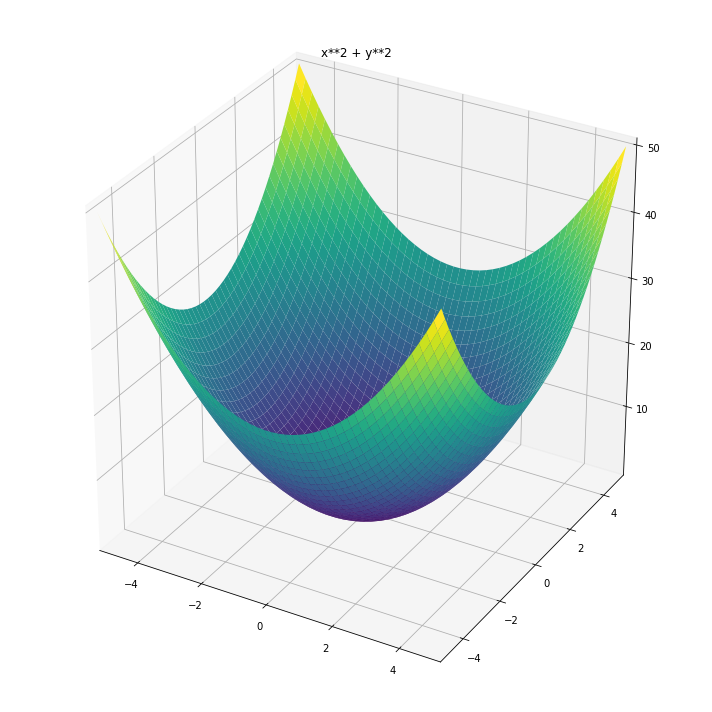

In [81]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

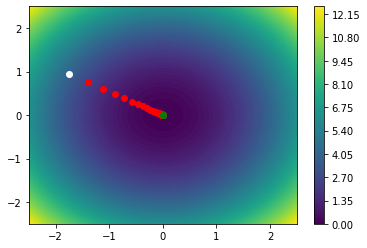

Solucion: [-2.5059272087542653e-05, 1.3513639503560405e-05] 8.105855701896827e-10


In [88]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
 
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2 ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1 

#Iteraciones:500
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
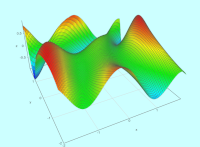


In [89]:
#Definimos la funcion
f2 = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]))

# Aproximamos el valor gradiente a un punto por su definición
def df2(punto):
  h = 0.01
  t = np.copy(punto)
  grad = np.zeros(2)
  for it, th in enumerate(punto):
    t[it] = t[it] + h
    grad[it] = (f2(t) - f2(punto))/h
  return grad


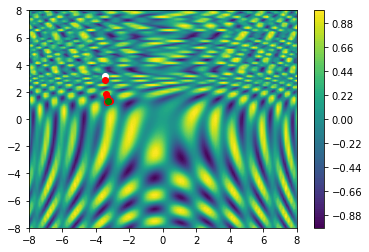

Solucion: [-3.2675502160420624, 1.3578831951584058] -0.9997224300896005


In [96]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango= 8
 
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f2([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-4,4),random.uniform(-4,4) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1 

#Iteraciones:500
for _ in range(50):
  grad = df2(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f2(P))


Cada vez que lo ejecutamos encontramos un mínimo local, pero no sabemos si es el mínimo global.